In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

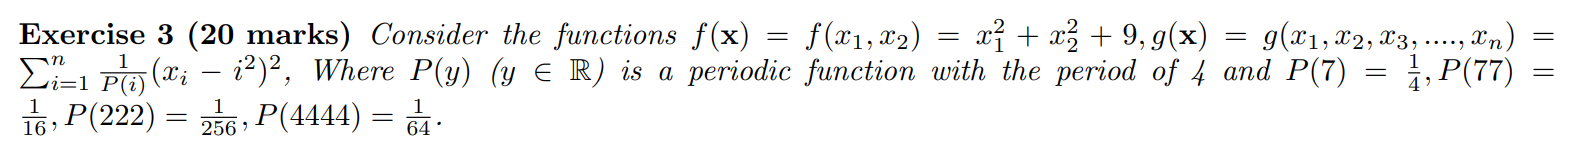

1. What is the minimizer and minimum function value of f(x) and g(x) ? Are both the function convex ? Explain.

$f(x_1, x_2) = x_1^2 + x_2^2 + 9$ is always positive, hence minimum at lowest it can achieve is 9. We can easily inspect that the minimizer of the function is (0,0). The function is also convex because its hessian is 2*I where I is identity matrix, which is positive definite.

Note that for $g(x)$ it is sum of convex functions. And sum of convex functions is convex. As for the minimizer, we can see that $x_i  = i^2$ is the minimizer and the minimum is 0

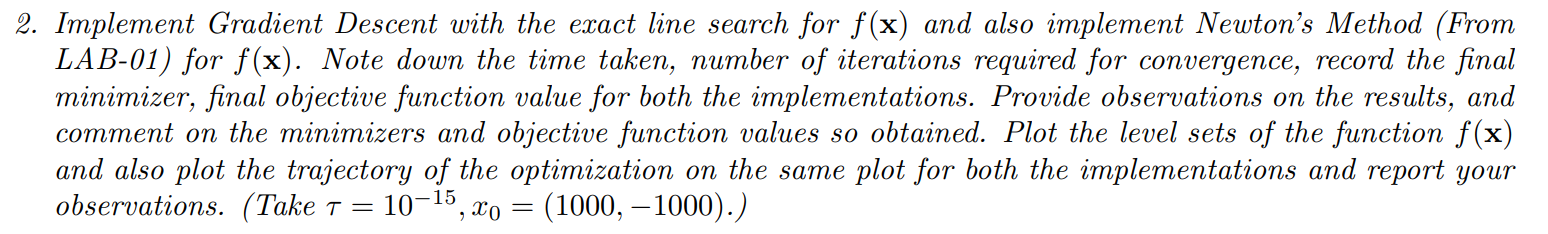

$f(x) = x_1^2 + x_2^2 + 9$, which means $\nabla{f} = <2x_1, 2x_2>$.
Using the exact line search methodology, we get, $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = argmin_{\alpha \geq 0}g(\alpha)$

$f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = f(x_1(1-2\alpha), x_2(1-2\alpha)) = (x_1^2 + x_2^2)(1-2\alpha)^2 + 9 = g(\alpha)$
Minimum for the above  function (which is always positive) will be achieved when $\alpha = 0.5$

Hence, the closed form solution for the $\alpha = argmin_{\alpha \geq 0}f( \mathbf{x} - \alpha \nabla{f}(\mathbf{x}) ) = 0.5$

Exact Line Search Method for above

In [3]:
tau = 1e-15
x0 = np.array([1000,-1000])


def fx(x):
  x1 = x[0]
  x2 = x[0]
  return x1**2 + x2**2 + 9

def gradf(x):
  return np.array([-2*x[0], -2*x[1]])


iterations = []

xk = np.copy(x0)
count = 0
pk = gradf(xk)
alpha = 0.5

while norm(pk)>tau:
    xk = xk + alpha*pk
    pk = gradf(xk)
    count += 1
print("No. of Iterations: ", count)
print("Minimizer in Exact Search: ", xk)
print("Minimum for the function in Exact Search is: ", fx(xk))



No. of Iterations:  1
Minimizer in Exact Search:  [0. 0.]
Minimum for the function in Exact Search is:  9.0


Newton's Method for above function

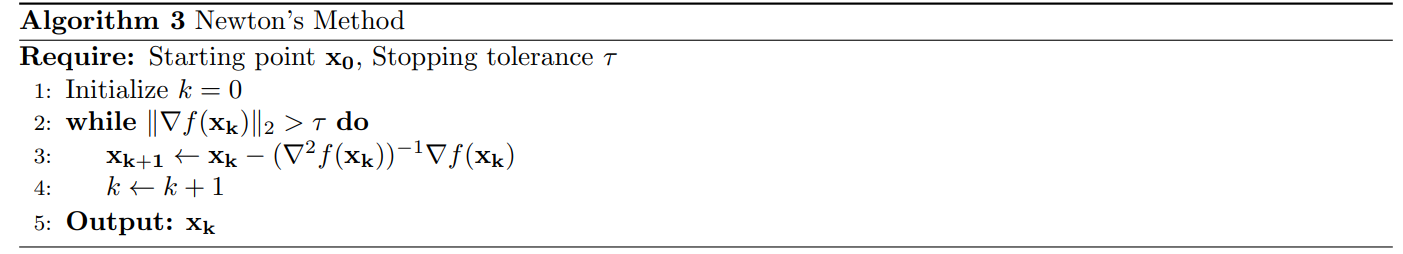

To apply newton's method we need hessian as well.

Here $\nabla{f} = <2x_1, 2x_2>$ which means
$\nabla^2{f} = \begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}$

In [4]:
xk = np.copy(x0)
count = 0
while norm(gradf(xk)) > tau:
  xk = xk + np.linalg.inv(np.array([[2,0],[0,2]]))@gradf(xk)
  count += 1

In [5]:
print("No. of Iterations in Newton's Method: ", count)
print("Minimizer in Newton's Method: ", xk)
print("Minimum for the function in Newton's Method is: ", fx(xk))

No. of Iterations in Newton's Method:  1
Minimizer in Newton's Method:  [0. 0.]
Minimum for the function in Newton's Method is:  9.0


Plotting Level Curves and Trajectory for Both

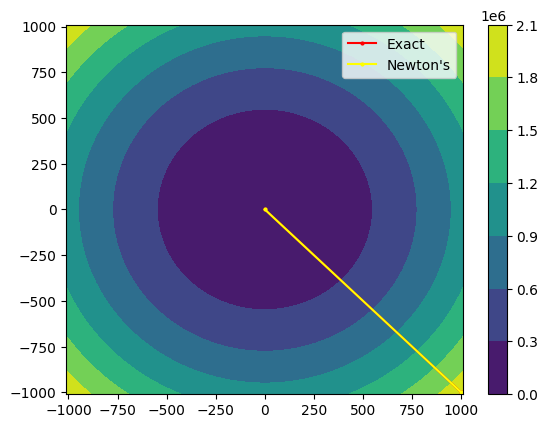

In [6]:
def fxnp(x1,x2):
  return x1**2 + x2**2 + 9

x = np.linspace(-1010, 1010, 10000)
y = np.linspace(-1010, 1010, 10000)
X, Y = np.meshgrid(x, y)
Z = fxnp(X,Y)
p = plt.contourf(X,Y,Z)  #,locator = ticker.LogLocator()
cbar = plt.colorbar(p)
xcordinates = []
ycordinates = []
xcordinates.append(x0[0])
ycordinates.append(x0[1])
xk = np.copy(x0)
count = 0
pk = gradf(xk)
alpha = 0.5

while norm(pk)>tau:
    xk = xk + alpha*pk
    pk = gradf(xk)
    count += 1
    xcordinates.append(xk[0])
    ycordinates.append(xk[1])
plt.plot(xcordinates,ycordinates, marker='o', color="red", markersize = 2, label = "Exact")


## Newton's Method Trajectory

xcordinates = []
ycordinates = []
xcordinates.append(x0[0])
ycordinates.append(x0[1])
xk = np.copy(x0)
count = 0
while norm(gradf(xk)) > tau:
  xk = xk + np.linalg.inv(np.array([[2,0],[0,2]]))@gradf(xk)
  count += 1
  xcordinates.append(xk[0])
  ycordinates.append(xk[1])

plt.plot(xcordinates,ycordinates, marker='o', color="yellow", markersize = 2, label = "Newton's")
plt.legend()


plt.show()


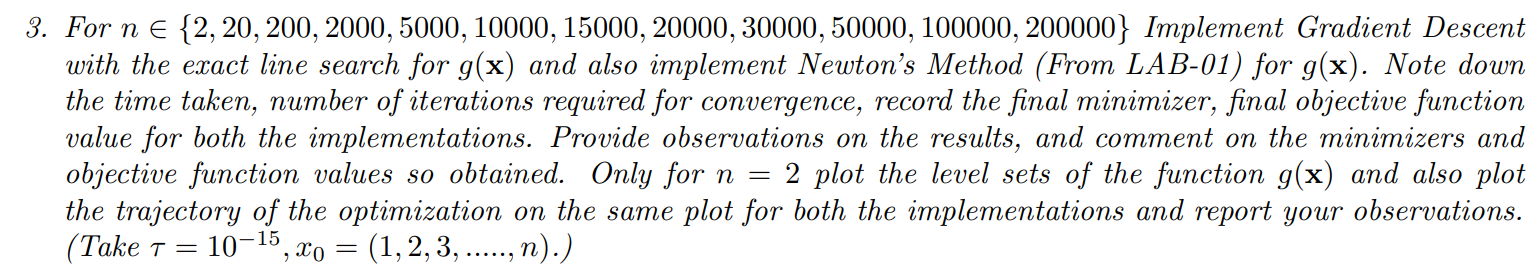

Now for $g(\mathbf{x}) = \sum_{i=1}^{n}\frac{(x_i-i^2)^2}{P(i)}$

$\nabla g(\mathbf{x})= <\frac{2(x_i - i^2)}{P(i)}> $ where gradient is n dimensional vector for $i = 1, 2, ... n$

P(i) can also be calculated by using periodicity:

$P(0) = 1/64$

$P(1) = 1/16$

$P(2) = 1/256$

$P(3) = 1/4$

Rest can be calculated using periodicity.

The exact line search $\alpha$ for this function is calculated below:



In [7]:
n = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]

P = [1/64, 1/16, 1/256, 1/4]

def alphacalculator(x):
  num = 0
  den = 0
  n = len(x)
  for i in range(1, n+1):
    num += (x[i-1] - i**2)**2/(P[i%4]**2)
  for i in range(1,n+1):
    den += (x[i-1] - i**2)**2/(P[i%4]**3)
  return num/(2*den)


def gradg(xk):
  return np.array([ 2*(xk[i]-(i+1)**2)/P[(i+1)%4]  for i in range(len(xk)) ])

def gx(x):
  res = 0
  for i in range(len(x)):
    res += (x[i] - (i+1)**2)**2/P[(i+1)%4]
  return res

tau = 1e-15


for k in n:
  print("current iteration is for n=", k)
  x0 = [i for i in range(1,k+1)]
  iterations = []
  xk = np.copy(x0)
  count = 0
  pk = gradg(xk)
  while norm(pk)>tau:
    alpha = alphacalculator(xk)
    xk = xk - alpha*pk
    pk = gradg(xk)
    count += 1

  iterations.append(count)
  print("total iterations it took for this run is: ", count)
  print("minimizer is: ", xk)
  print("minimum is: ", gx(xk))
  print("--------------------------------------------------------")


current iteration is for n= 2
total iterations it took for this run is:  1
minimizer is:  [1. 4.]
minimum is:  0.0
--------------------------------------------------------
current iteration is for n= 20
total iterations it took for this run is:  742
minimizer is:  [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100. 121. 144. 169. 196.
 225. 256. 289. 324. 361. 400.]
minimum is:  0.0
--------------------------------------------------------
current iteration is for n= 200
total iterations it took for this run is:  651
minimizer is:  [1.0000e+00 4.0000e+00 9.0000e+00 1.6000e+01 2.5000e+01 3.6000e+01
 4.9000e+01 6.4000e+01 8.1000e+01 1.0000e+02 1.2100e+02 1.4400e+02
 1.6900e+02 1.9600e+02 2.2500e+02 2.5600e+02 2.8900e+02 3.2400e+02
 3.6100e+02 4.0000e+02 4.4100e+02 4.8400e+02 5.2900e+02 5.7600e+02
 6.2500e+02 6.7600e+02 7.2900e+02 7.8400e+02 8.4100e+02 9.0000e+02
 9.6100e+02 1.0240e+03 1.0890e+03 1.1560e+03 1.2250e+03 1.2960e+03
 1.3690e+03 1.4440e+03 1.5210e+03 1.6000e+03 1.6810e+03 1.7640

KeyboardInterrupt: 

In [ ]:
## USing newtons methods

n = [2, 20, 200, 2000, 5000, 10000, 15000, 20000, 30000, 50000, 100000, 200000]

P = [1/64, 1/16, 1/256, 1/4]

tau = 1e-15


for k in n:
  print("current iteration is for n=", k)
  A = np.zeros((k,k))
  for i in range(k):
    for j in range(k):
      if i==j:
        A[i,j] = 1/P[(i+1)%4]
  b = np.array([-2*i**2/P[i%4] for i in range(1,k+1)])
  c = sum([i**4/P[i%4] for i in range(1,k+1)])
  x0 = [i for i in range(1,k+1)]
  iterations = []
  xk = np.copy(x0)
  count = 0
  pk = 2*A@xk + b
  while norm(pk)>tau:
    xk = xk - np.linalg.inv(2*A)@(2*A@xk+b)
    pk = 2*A@xk + b
    count += 1

  iterations.append(count)
  print("total iterations it took for this run is: ", count)
  print("minimizer is: ", xk)
  print("minimum is: ", xk@A@xk + b@xk + c)
  print("--------------------------------------------------------")


current iteration is for n= 2
total iterations it took for this run is:  1
minimizer is:  [1. 4.]
minimum is:  0.0
--------------------------------------------------------
current iteration is for n= 20
total iterations it took for this run is:  1
minimizer is:  [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100. 121. 144. 169. 196.
 225. 256. 289. 324. 361. 400.]
minimum is:  0.0
--------------------------------------------------------
current iteration is for n= 200
total iterations it took for this run is:  1
minimizer is:  [1.0000e+00 4.0000e+00 9.0000e+00 1.6000e+01 2.5000e+01 3.6000e+01
 4.9000e+01 6.4000e+01 8.1000e+01 1.0000e+02 1.2100e+02 1.4400e+02
 1.6900e+02 1.9600e+02 2.2500e+02 2.5600e+02 2.8900e+02 3.2400e+02
 3.6100e+02 4.0000e+02 4.4100e+02 4.8400e+02 5.2900e+02 5.7600e+02
 6.2500e+02 6.7600e+02 7.2900e+02 7.8400e+02 8.4100e+02 9.0000e+02
 9.6100e+02 1.0240e+03 1.0890e+03 1.1560e+03 1.2250e+03 1.2960e+03
 1.3690e+03 1.4440e+03 1.5210e+03 1.6000e+03 1.6810e+03 1.7640e+03

Report for which value of n in (3) the Newton’s Method implementation got failed due to Google Colab Crash. If
we change the starting point x0 in part (2), then will the number of iterations required for convergence decreases,
increases or remains same ?, What about the same in part (3) ? Explain. Now consider g(x) for this n at
which Google Colab Crash occurs and devise a method, implement it such that we get the number of iterations
required for convergence as 1. Here, in the implementation part you are free to choose any starting point which is related to your devised method but take τ = 10−15. Explain the devised method clearly and provide the logical
observations of the results that you got. (Hint: Use the results from (2) and think about relating g(x) and
f(x).)

For Newton's the colab fails at n = 15000. Even if we change the starting point in part(2) then iteration will remain same. This won't be true for (3)